In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
spam_df=pd.read_csv('3_emails (1).csv')

In [28]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [29]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [30]:
spam_df.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [31]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [32]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## Visualize the Data


In [33]:
ham=spam_df[spam_df['spam']==0]

In [34]:
spam=spam_df[spam_df['spam']==1]

In [35]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [36]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [37]:
print('Spam Percentage =',(len(spam)/len(spam_df))*100,'%')

Spam Percentage = 23.88268156424581 %


In [38]:
print('Ham Percentage =',(len(ham)/len(spam_df))*100,'%')

Ham Percentage = 76.11731843575419 %


<Axes: ylabel='count'>

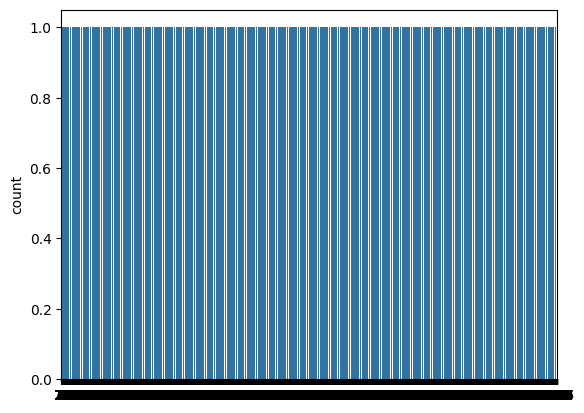

In [39]:
sns.countplot(spam_df['spam'],label='Spam vs Ham')

## Applying CountVectorizer to our Spam Ham Example

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
spamham_countVectorizer=vectorizer.fit_transform(spam_df['text'])

In [25]:
print(vectorizer.get_feature_names())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [21]:
spamham_countVectorizer.shape

(5728, 37303)

## Dividing the Cell for Training and Testing Prior to Training

In [25]:
label=spam_df['spam']
X=spamham_countVectorizer
y=label

In [26]:
X.shape

(5728, 37303)

In [27]:
y.shape

(5728,)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

## Evaluating The Model 

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
y_predict_train=NB_classifier.predict(X_train)
y_predict_train

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [34]:
cm=confusion_matrix(y_train,y_predict_train)

<AxesSubplot:>

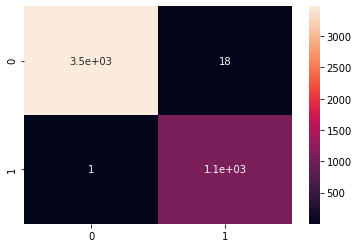

In [35]:
sns.heatmap(cm,annot=True)

In [38]:
y_predict_test=NB_classifier.predict(X_test)
y_predict_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [39]:
cm=confusion_matrix(y_test,y_predict_test)


<AxesSubplot:>

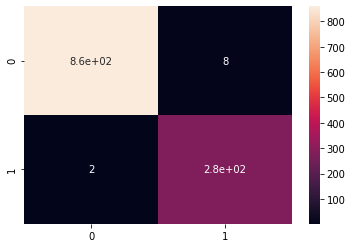

In [40]:
sns.heatmap(cm,annot=True)

In [42]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       867
           1       0.97      0.99      0.98       279

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
emails = pd.read_csv('3_emails (1).csv')

# Create feature vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails['text'])
y = emails['spam']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam']))

# Plot class distribution
plt.figure(figsize=(8, 6))
emails['spam'].value_counts().plot(kind='bar')
plt.title('Distribution of Spam vs Not Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'], rotation=0)
plt.show()

# Print model accuracy
print(f'\nModel Accuracy: {nb_classifier.score(X_test, y_test):.2%}')